In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,export_graphviz
import graphviz

In [ ]:
data=pd.read_csv('heart_disease_uci.csv')
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
y=data['num']
x=data.drop(['num'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)


In [ ]:
export_train=pd.concat([x_train,y_train],axis=1)
export_train.to_csv('export_train.csv',index=False)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
x_train = pd.get_dummies(x_train, drop_first=True)
x_test = pd.get_dummies(x_test, drop_first=True)
parameter={
    'max-depth' : [10,20,30,40,50,60,70,80,90,100,],
    'criterion' :('gini','entropy'),
    'max-depth' :(3,5,7,9,10),
    'max-features' :('auto','sqrt','log2'),
    'min-samples-split' : (2,4,6)
}



In [ ]:
x_train = pd.get_dummies(x_train, drop_first=True)
x_test = pd.get_dummies(x_test, drop_first=True)

parameter={
    'criterion' :('gini','entropy'),
    'max_depth' :(3,5,7,9,10),
    'max_features' :('sqrt','log2'), # Removed 'auto'
    'min_samples_split' : (2,4,6)
}

GT_grid=RandomizedSearchCV(DecisionTreeClassifier(),param_distributions=parameter,cv=5,verbose=True)
GT_grid.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': (3, 5, 7, 9, 10),
                                        'max_features': ('sqrt', 'log2'),
                                        'min_samples_split': (2, 4, 6)},
                   verbose=True)

In [ ]:
GT_grid=RandomizedSearchCV(DecisionTreeClassifier(),param_distributions=parameter,cv=5,verbose=True)
GT_grid.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': (3, 5, 7, 9, 10),
                                        'max_features': ('sqrt', 'log2'),
                                        'min_samples_split': (2, 4, 6)},
                   verbose=True)

In [ ]:
GT_grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       min_samples_split=4)

In [ ]:
DT_model=DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       min_samples_split=4)

In [ ]:
DT_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       min_samples_split=4)

In [ ]:
print(f'train score : {DT_model.score(x_train,y_train):.3f}')
print(f'test score : {DT_model.score(x_test,y_test):.3f}')

train score : 0.674
test score : 0.560


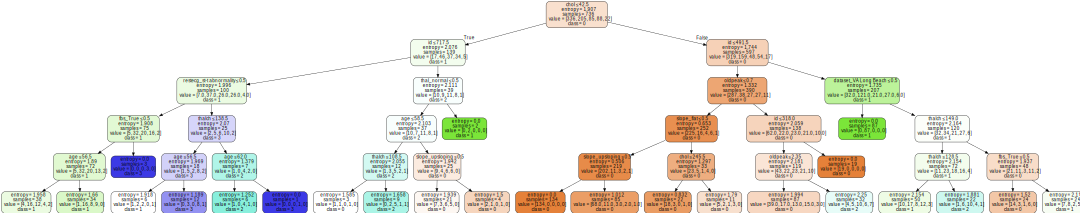

In [ ]:
dot_data = export_graphviz(DT_model, feature_names=x_train.columns, class_names=[str(i) for i in sorted(y.unique())], rounded=True, filled=True, special_characters=True)
# Add graph attributes for better visualization, including size for page adjustment
dot_data = dot_data.replace('digraph Tree {', 'digraph Tree {\nsize="15,10";') # You can adjust the size values as needed
graph = graphviz.Source(dot_data)
graph

In [ ]:
dot_data=export_graphviz(DT_model,feature_names=x_train.columns,class_names=[str(i) for i in sorted(y.unique())],rounded=True,filled=True,special_characters=True)
graph=graphviz.Source(dot_data)
graph.render('Heart_diseases')

'Heart_diseases.pdf'